<a href="https://colab.research.google.com/github/CallmeSIRI/BasicProg_DataViz65/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ข้อสอบจำนวน 1 ข้อ คะแนน 120 เต็ม 100 คะแนน

จุดมุ่งหมาย: ตัดเกรดรายวิชา Projec
t และวาดกราฟแสดงผลการสอบดังรายละเอียดต่อไปนี้

1. คะแนนประกอบด้วย 2 ส่วน
* คะแนน 40% จากอาจารย์ที่ปรึกษา (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)
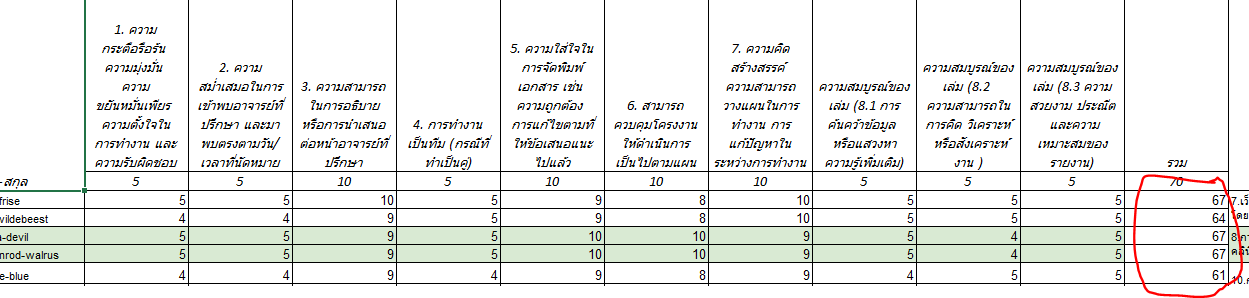

* คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) *(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)*

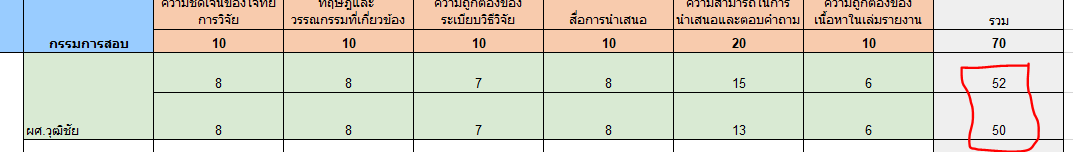

ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/1YB4qdluEN8dCE7vhDrNOW40JoUDyeEyL?usp=sharing

2. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน
*คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)* 

3. วาดกราฟ
* Stacked Barchartแสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)
* Histogram แสดงจำนวนผู้ได้เกรดต่างๆ
* Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

*คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)*

#ตัวอย่าง code บางส่วน ที่อาจจะมีประโยชน์กับการทำข้อสอบ

In [2]:
import pandas as pd  # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
from google.colab import drive # เชื่อม google drive กับ colab ของเรา นี้เป็นคำสั่งเชื่อม |accout colab กับ Drive ควรเป็น accout เดียวกัน|
drive.mount('/content/drive')
import os # การจัดเก็บเกี่ยวกับไฟล์ต่าง ๆ มันอยู่ที่โฟลเดอร์ไหน จะ list โฟล์เดอร์ออกมา

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Final BPVZ65' #บอกทางผ่านในการไปเอาไฟล์ของเรา ว่าผ่านทางไหนบ้าง

In [4]:
day0 = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day0.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58


In [5]:
day0_1 = day0.fillna(method='ffill')
day0_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [6]:
all_aj_list = set(list(day0_1['กรรมการสอบ'].dropna()))
all_aj_list

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [7]:
advisor = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
advisor.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN


#1.คะแนนประกอบด้วย 2 ส่วน

##คะแนน 40% จากอาจารย์ที่ปรึกษา (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

In [8]:
cc = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name=0,skiprows=1)
cc.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN


In [9]:
pp = cc
pp

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN
5,bumpy-indigo-dolphin,5,5,8,5,9,10,10,5,5,5,67,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...
6,randy-rust-lionfish,4,4,7,5,8,10,9,4,5,4,60,NaN
7,flaky-sepia-setter,5,5,9,5,10,10,10,5,5,5,69,32.ความเสี่ยงทางไซเบอร์ในองค์กรที่มีสาเหตุมาจา...
8,pasty-tomato-okapi,5,5,9,5,10,10,10,5,5,5,69,NaN


##คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) *(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)*

In [10]:
day0_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [11]:
day0_1['คะแนนร้อยละ30'] = day0_1['รวม']*30/70
day0_1

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม,คะแนนร้อยละ30
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70,30.000000
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52,22.285714
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50,21.428571
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60,25.714286
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58,24.857143
5,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52,22.285714
6,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,stinky-red-chow,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52,22.285714
7,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,อ.ยุภาพร,7,7,7,7,13,7,48,20.571429
8,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,stinky-red-chow,ดร.ธิปไตย,อ.ยุภาพร,7,7,7,7,13,7,48,20.571429
9,SC 6502\n,08:00 – 10.00 น.,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...,paltry-plum-saola,รศ.ธิดาเดียว,ดร.อุทุมพร,10,10,7,7,13,6,53,22.714286


In [24]:
day0_11 = day0_1[['นักศึกษา','อาจารย์','กรรมการสอบ','รวม','คะแนนร้อยละ30']]
day0_11

,นักศึกษา,อาจารย์,กรรมการสอบ,รวม,คะแนนร้อยละ30
0,NaN,ที่ปรึกษา,NaN,70,30.000000
1,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,52,22.285714
2,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,50,21.428571
3,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,60,25.714286
4,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,58,24.857143
5,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,52,22.285714
6,stinky-red-chow,ดร.ธิปไตย,ผศ.วุฒิชัย,52,22.285714
7,wiggy-silver-drever,ดร.ธิปไตย,อ.ยุภาพร,48,20.571429
8,stinky-red-chow,ดร.ธิปไตย,อ.ยุภาพร,48,20.571429
9,paltry-plum-saola,รศ.ธิดาเดียว,ดร.อุทุมพร,53,22.714286


In [38]:
d1 = day0_11.groupby(['นักศึกษา'])[['คะแนนร้อยละ30']].sum()
d1

,คะแนนร้อยละ30
นักศึกษา,
boozy-thistle-wildebeest,49.285714
chewy-persimmon-catfish,40.714286
chummy-goldenrod-walrus,45.000000
cloudy-wheat-bobcat,47.142857
craggy-cream-reindeer,50.142857
flimsy-lemon-budgerigar,48.428571
gloppy-persimmon-flamingo,47.142857
gloppy-xanthic-retriever,45.000000
greasy-eggplant-oyster,37.285714


###30% ตาราง 1

In [49]:
d1.rename(columns={'คะแนนร้อยละ30': 'คะแนนร้อยละ60'}, inplace=True)
d1

,คะแนนร้อยละ60
นักศึกษา,
boozy-thistle-wildebeest,49.285714
chewy-persimmon-catfish,40.714286
chummy-goldenrod-walrus,45.000000
cloudy-wheat-bobcat,47.142857
craggy-cream-reindeer,50.142857
flimsy-lemon-budgerigar,48.428571
gloppy-persimmon-flamingo,47.142857
gloppy-xanthic-retriever,45.000000
greasy-eggplant-oyster,37.285714


In [51]:
d1.isnull().any()

คะแนนร้อยละ60    False
dtype: bool

In [13]:
day0_2 = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=1,skiprows=1)
day0_2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,9.0,9,9.0,8.0,18.0,8.0,61
3,NaN,NaN,NaN,tasty-myrtle-ant,NaN,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,8.0,8,9.0,9.0,17.0,9.0,60


In [14]:
day0_2 = day0_2.fillna(method='ffill')
day0_2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60


In [16]:
day0_2['คะแนนร้อยละ30'] = day0_2['รวม']*30/70
day0_2

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม,คะแนนร้อยละ30
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70,30.000000
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63,27.000000
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61,26.142857
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60,25.714286
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60,25.714286
5,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,17.0,7.0,58,24.857143
6,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,crappy-burgundy-quoll,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,18.0,7.0,59,25.285714
7,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,8.0,59,25.285714
8,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,crappy-burgundy-quoll,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,8.0,59,25.285714
9,SC 6501,13:00 – 15.00 น.,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...,skinny-bronze-dormouse,ดร.วรรณพร,รศ.ธิดาเดียว,9.0,9,9.0,9.0,17.5,7.5,61,26.142857


In [17]:
day0_21 = day0_2[['นักศึกษา','อาจารย์','กรรมการสอบ','รวม','คะแนนร้อยละ30']]
day0_21

,นักศึกษา,อาจารย์,กรรมการสอบ,รวม,คะแนนร้อยละ30
0,NaN,ที่ปรึกษา,NaN,70,30.000000
1,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,63,27.000000
2,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,61,26.142857
3,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,60,25.714286
4,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,60,25.714286
5,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,58,24.857143
6,crappy-burgundy-quoll,รศ.วิชุดา,ดร.ธนพงศ์,59,25.285714
7,sleazy-mauve-akita,รศ.วิชุดา,ดร.พลากร,59,25.285714
8,crappy-burgundy-quoll,รศ.วิชุดา,ดร.พลากร,59,25.285714
9,skinny-bronze-dormouse,ดร.วรรณพร,รศ.ธิดาเดียว,61,26.142857


In [39]:
d2 = day0_21.groupby(['นักศึกษา'])[['คะแนนร้อยละ30']].sum()
d2

,คะแนนร้อยละ30
นักศึกษา,
bumpy-indigo-dolphin,45.857143
chewy-lilac-shark,47.571429
cozy-teal-whale,51.857143
craggy-mustard-sponge,45.428571
crappy-burgundy-quoll,50.571429
flabby-green-fish,52.285714
freaky-lemon-peccary,51.857143
fuzzy-silver-discus,45.428571
geeky-harlequin-duck,50.571429


In [48]:
d2.rename(columns={'คะแนนร้อยละ30': 'คะแนนร้อยละ60'}, inplace=True)
d2

,คะแนนร้อยละ60
นักศึกษา,
bumpy-indigo-dolphin,45.857143
chewy-lilac-shark,47.571429
cozy-teal-whale,51.857143
craggy-mustard-sponge,45.428571
crappy-burgundy-quoll,50.571429
flabby-green-fish,52.285714
freaky-lemon-peccary,51.857143
fuzzy-silver-discus,45.428571
geeky-harlequin-duck,50.571429


In [19]:
day0_3 = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=2,skiprows=1)
day0_3.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,NaN,NaN,NaN,NaN,NaN,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,NaN,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,NaN,NaN,NaN,craggy-cream-paradise,NaN,NaN,9.0,8.0,8.0,8.0,16.0,8.0,57


In [20]:
day0_3 = day0_3.fillna(method='ffill')
day0_3.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57


In [21]:
day0_3['คะแนนร้อยละ30'] = day0_3['รวม']*30/70
day0_3

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม,คะแนนร้อยละ30
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70,30.000000
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51,21.857143
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45,19.285714
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57,24.428571
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57,24.428571
5,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59,25.285714
6,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59,25.285714
7,SC 6501,13:00 – 15.00 น.,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,pokey-asparagus-frise,ผศ.วุฒิชัย,ดร.ธิปไตย,9.0,9.0,9.0,9.0,17.0,9.0,62,26.571429
8,SC 6501,13:00 – 15.00 น.,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,randy-charcoal-flamingo,ผศ.วุฒิชัย,ดร.ธิปไตย,9.0,9.0,9.0,9.0,16.0,9.0,61,26.142857
9,SC 6501,13:00 – 15.00 น.,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,pokey-asparagus-frise,ผศ.วุฒิชัย,อ.ธรรณญพร,9.0,9.0,9.0,9.0,17.0,9.0,62,26.571429


In [22]:
day0_31 = day0_3[['นักศึกษา','อาจารย์','กรรมการสอบ','รวม','คะแนนร้อยละ30']]
day0_31

,นักศึกษา,อาจารย์,กรรมการสอบ,รวม,คะแนนร้อยละ30
0,NaN,ที่ปรึกษา,NaN,70,30.000000
1,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,51,21.857143
2,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,45,19.285714
3,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,57,24.428571
4,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,57,24.428571
5,ugly-harlequin-octopus,รศ.วิชุดา,อ.ยุภาพร,59,25.285714
6,craggy-cream-paradise,รศ.วิชุดา,อ.ยุภาพร,59,25.285714
7,pokey-asparagus-frise,ผศ.วุฒิชัย,ดร.ธิปไตย,62,26.571429
8,randy-charcoal-flamingo,ผศ.วุฒิชัย,ดร.ธิปไตย,61,26.142857
9,pokey-asparagus-frise,ผศ.วุฒิชัย,อ.ธรรณญพร,62,26.571429


In [40]:
d3 = day0_31.groupby(['นักศึกษา'])[['คะแนนร้อยละ30']].sum()
d3

,คะแนนร้อยละ30
นักศึกษา,
breezy-pear-macaw,48.000000
chummy-azure-walrus,47.571429
clammy-zucchini-chicken,51.857143
cloudy-grey-walrus,51.428571
cloudy-myrtle-kudu,51.428571
cloudy-myrtle-whippet,51.428571
cozy-tangerine-ladybird,44.571429
craggy-cream-paradise,49.714286
flabby-asparagus-heron,17.571429


In [47]:
d3.rename(columns={'คะแนนร้อยละ30': 'คะแนนร้อยละ60'}, inplace=True)
d3

,คะแนนร้อยละ60
นักศึกษา,
breezy-pear-macaw,48.000000
chummy-azure-walrus,47.571429
clammy-zucchini-chicken,51.857143
cloudy-grey-walrus,51.428571
cloudy-myrtle-kudu,51.428571
cloudy-myrtle-whippet,51.428571
cozy-tangerine-ladybird,44.571429
craggy-cream-paradise,49.714286
flabby-asparagus-heron,17.571429
